<center><h1>Mass parameterized neural network with class weights on SR2 </h1>
John Ignacio R.M. Oct 2020</center>

In [10]:
# Ada library
ada_parent_dir = "../"
import sys
sys.path.append(ada_parent_dir)
from ada.data import read_dataset, split_dataset_by_mass, scores_per_class_weights, scores_per_mass
from ada.model import BinaryClassifierModel4 as BC4
from ada.plot import plot_confidence_matrix
import pandas as pd
import numpy as np

In [2]:
# Constants
seed = 420
source_path = "../../processed_data/xtohhOct2020"
dest_path = "../../saved_models/oct_2020"
signal = "Xtohh"
bg = "Xtohh_background"
region = "SR"
tag = 2
masses = [1000, 1200, 1400, 1600, 1800, 2000, 2500, 3000]

In [3]:
# Read dataset
dfs = {mass: read_dataset(source_path, signal+str(mass), bg, region, tag) for mass in masses}
df = pd.concat(dfs, names = ["mass", None])
df = df.reset_index(level = 0).reset_index(drop = True)
df.head()

,mass,EventWeight,label,m_FJpt,m_FJeta,m_FJphi,m_FJm,m_DTpt,m_DTeta,m_DTphi,m_DTm,m_dPhiFTwDT,m_dRFJwDT,m_dPhiDTwMET,m_MET,m_hhm,m_bbttpt
0,1000,0.000457,1,498.51450,-0.536601,-2.818808,119716.39,447.70572,-1.163481,1.234735,97467.30,2.229642,2.316092,0.605876,71.70186,927.69910,419.146580
1,1000,0.000348,1,549.95325,-1.375417,1.734355,121275.48,302.23140,-1.598841,-1.238216,96785.60,2.972570,2.980955,-0.169232,84.82113,846.36835,257.105600
2,1000,0.000591,1,513.64594,0.340504,-2.402172,134068.61,362.13004,-0.013702,0.731264,100451.04,3.133436,3.153392,0.193749,81.10068,907.06665,151.556750
3,1000,0.000620,1,483.49622,-1.430659,-0.469333,111137.67,410.57037,-1.323875,2.663501,105842.83,3.132834,3.134654,0.164603,64.79518,918.62680,73.030174
4,1000,0.000562,1,456.22528,-0.444622,0.358149,165661.98,363.99133,-0.550266,-2.998335,94892.64,2.926702,2.928608,-0.206495,151.07983,853.51350,127.067240


In [4]:
sets = split_dataset_by_mass(df, 0.5, 0.3, 0.2, seed, masses)

# BC4 Parameterized by Mass on SR2 with class weights

In [5]:
scores = scores_per_class_weights(BC4, sets, 10, range(10, 21, 1), np.arange(0.1, 0.9, 0.1), dest_path, "SR2_MassParam_Oct2020")

Training with bg weight: 10
Training with bg weight: 11
Training with bg weight: 12
Training with bg weight: 13
Training with bg weight: 14
Training with bg weight: 15
Training with bg weight: 16
Training with bg weight: 17
Training with bg weight: 18
Training with bg weight: 19
Training with bg weight: 20
2020-10-25 22:38:01.817905: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-10-25 22:38:01.846958: E tensorflow/stream_executor/cuda/cuda_driver.cc:351] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-10-25 22:38:01.847015: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (valkyrie): /proc/driver/nvidia/version does not exist
2020-10-25 22:38:01.849082: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-10-25 22:38

In [6]:
scores.nlargest(10, [0])

0         1      wavg
bg_weight th                               
13        0.6  0.930247  0.978452  0.967139
19        0.5  0.928308  0.977402  0.965880
          0.4  0.927979  0.977859  0.966152
13        0.5  0.927940  0.978270  0.966458
12        0.5  0.927131  0.978225  0.966234
13        0.4  0.926992  0.978265  0.966232
12        0.4  0.924695  0.977836  0.965364
          0.6  0.924608  0.977129  0.964803
          0.3  0.924199  0.977979  0.965357
10        0.5  0.923899  0.977011  0.964546

In [7]:
scores.nlargest(10, ["wavg"])

0         1      wavg
bg_weight th                               
13        0.6  0.930247  0.978452  0.967139
          0.5  0.927940  0.978270  0.966458
12        0.5  0.927131  0.978225  0.966234
13        0.4  0.926992  0.978265  0.966232
19        0.4  0.927979  0.977859  0.966152
          0.5  0.928308  0.977402  0.965880
12        0.4  0.924695  0.977836  0.965364
          0.3  0.924199  0.977979  0.965357
          0.6  0.924608  0.977129  0.964803
10        0.5  0.923899  0.977011  0.964546

# BC4 with 13:10 class weights and th 0.6

In [12]:
model = BC4(sets["x"]["train"].shape[1])
model.load(dest_path, "bg13signal10_SR2_MassParam_Oct2020")

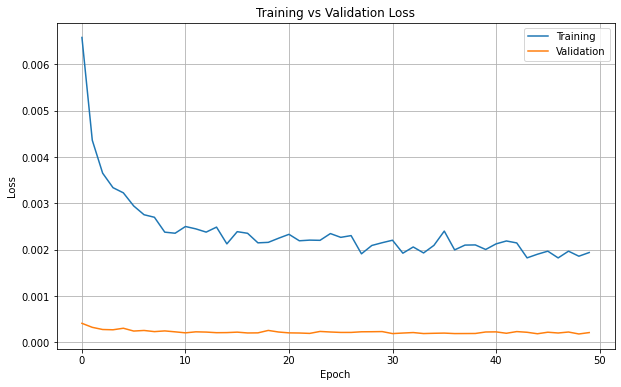

In [14]:
model.plot_loss()

Accuracy: 0.9848858375391766


,0,1,macro avg,weighted avg
precision,0.976964,1.001245,0.989105,0.985273
recall,1.000617,0.954643,0.977630,0.984886
f1-score,0.988649,0.977389,0.983019,0.984796
support,0.360450,0.187494,0.547944,0.547944


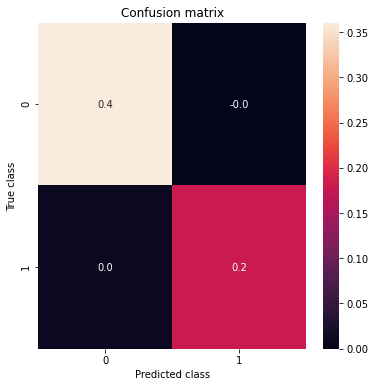

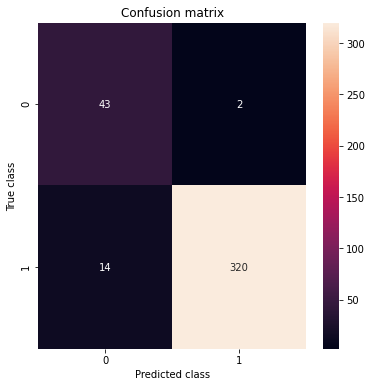

Accuracy: 0.9538702646244271


,0,1,macro avg,weighted avg
precision,0.910953,0.976769,0.943861,0.954912
recall,0.954386,0.953614,0.954000,0.953870
f1-score,0.932164,0.965053,0.948608,0.954131
support,0.496357,0.998274,1.494630,1.494630


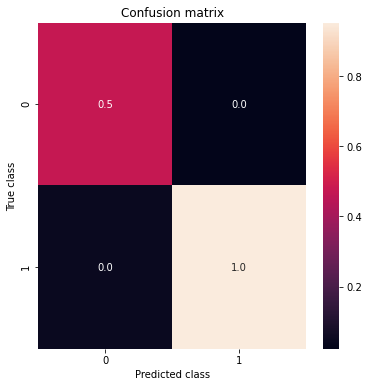

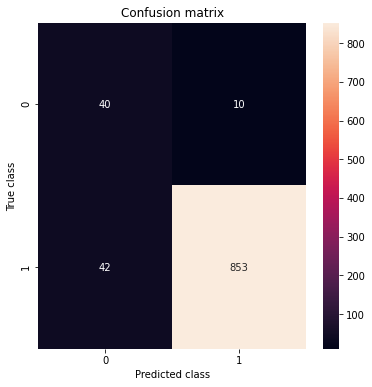

Accuracy: 0.9647607522935102


,0,1,macro avg,weighted avg
precision,0.916019,0.983850,0.949935,0.965577
recall,0.956922,0.967651,0.962287,0.964761
f1-score,0.936024,0.975683,0.955854,0.964999
support,0.575024,1.559477,2.134501,2.134501


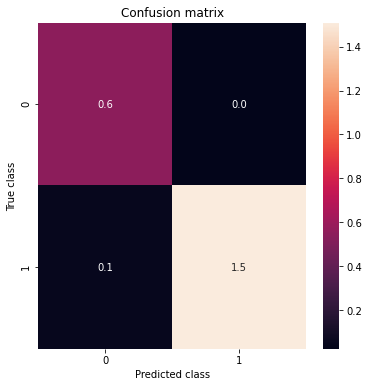

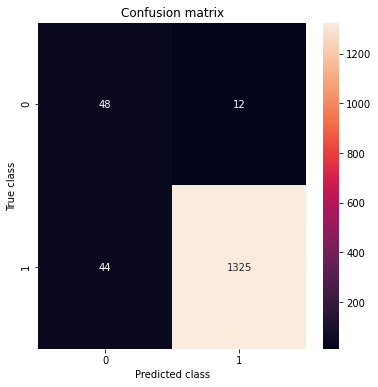

Accuracy: 0.9274911810508095


,0,1,macro avg,weighted avg
precision,0.775287,0.950418,0.862852,0.925097
recall,0.701972,0.965610,0.833791,0.927491
f1-score,0.736810,0.957954,0.847382,0.925979
support,0.312190,1.847002,2.159192,2.159192


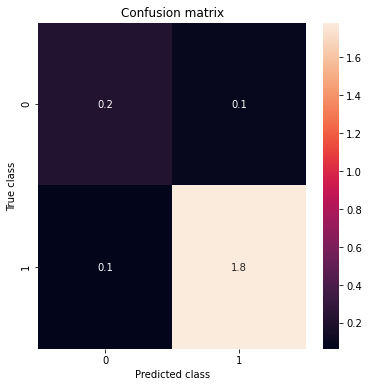

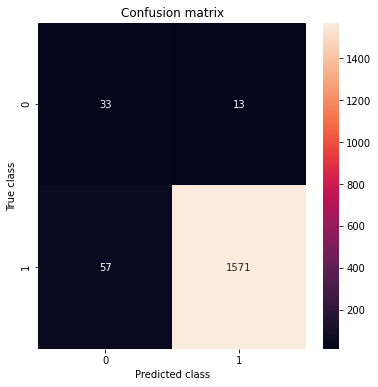

Accuracy: 0.9680154824064658


,0,1,macro avg,weighted avg
precision,0.866007,0.982635,0.924321,0.968203
recall,0.877263,0.980832,0.929047,0.968015
f1-score,0.871599,0.981733,0.926666,0.968104
support,0.278024,1.968723,2.246747,2.246747


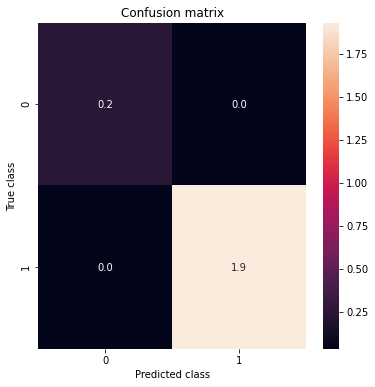

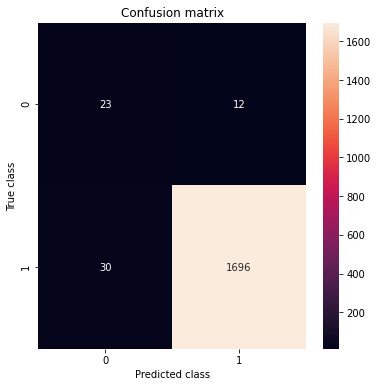

Accuracy: 0.9870509020952609


,0,1,macro avg,weighted avg
precision,0.936577,0.998127,0.967352,0.987659
recall,0.990967,0.986248,0.988608,0.987051
f1-score,0.963004,0.992152,0.977578,0.987195
support,0.397218,1.938392,2.335610,2.335610


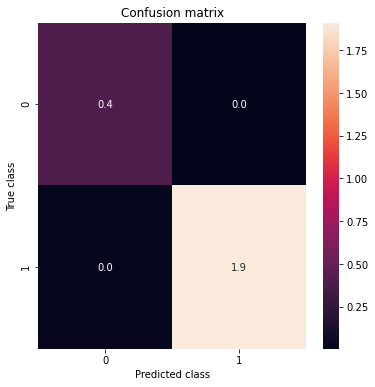

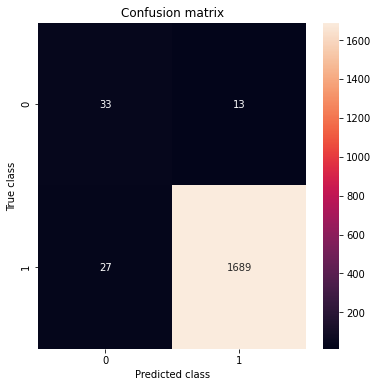

Accuracy: 0.9834289769139789


,0,1,macro avg,weighted avg
precision,0.976894,0.985034,0.980964,0.983368
recall,0.941286,0.994272,0.967779,0.983429
f1-score,0.958759,0.989631,0.974195,0.983314
support,0.397792,1.546116,1.943909,1.943909


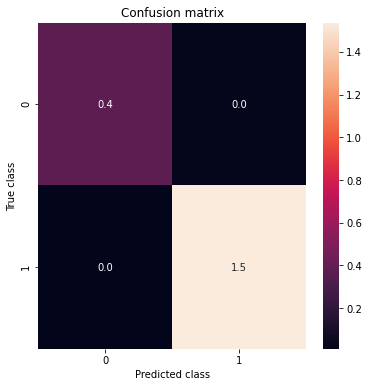

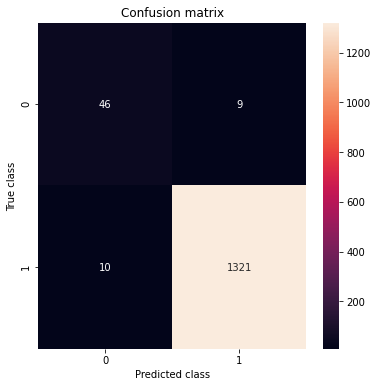

Accuracy: 0.9807737844375883


,0,1,macro avg,weighted avg
precision,0.977043,0.982983,0.980013,0.980761
recall,0.971425,0.986360,0.978893,0.980774
f1-score,0.974226,0.984669,0.979447,0.980763
support,0.541472,0.906135,1.447607,1.447607


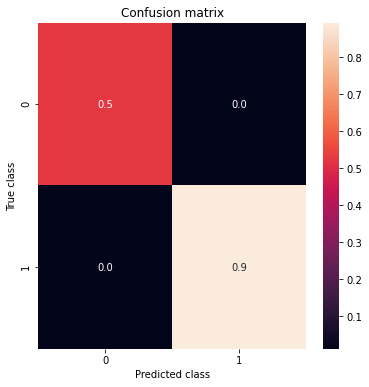

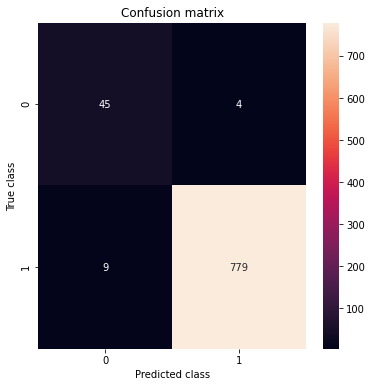

In [13]:
#eval_BC4_{mass}_bg13signal10_SR2_MassParam_Oct2020.json
scores_per_mass(model, sets, masses, 0.6, save = True, dest_path="./scores", title="bg13signal10_SR2_MassParam_Oct2020")